In [1]:
#IMPORTANDO BIBLIOTECAS
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9,9)
from scipy.integrate import odeint
import numpy
import math

In [2]:
#INFORMAÇÕES DO DANONE E DA GELADEIRA, NO SISTEMA INTERNACIONAL DE UNIDADES
Massa_de_iogurte = numpy.arange(0.02, 0.5, 0.025) #em kg
Massa_do_recipiente = 0.02 #em kg
Temperatura_iogurte = 298 #em Kelvin
Temperatura_recipiente = 298 #em Kelvin
Temperatura_geladeira = 278 #em Kelvin
Temperatura_faixalimite_geladeira = 293 #em Kelvin
Altura_recipiente = 0.03 #em m
Raio_maior_recipiente = 0.04 #em m
Raio_menor_recipiente = 0.028 #em m
Area_recipiente = (math.pi*(Raio_maior_recipiente + Raio_menor_recipiente)*(((Raio_maior_recipiente-Raio_menor_recipiente)**2) + ((Altura_recipiente)**2))) + (((Raio_menor_recipiente)**2)*math.pi) #em m^2
Area_tampa = (Raio_maior_recipiente**2)*math.pi #em m^2
Espessura_recipiente = 0.001 #em m
Espessura_tampa =  0.001 #em m
Calor_especifico_iogurte = 4000 #em J/kg K
Calor_especifico_recipiente = 1700 #em J/kg K
Coeficiente_conducao_recipiente = 0.2 #em W/m2k
Coeficiente_conducao_tampa = 239 #em W/m2k
Coeficiente_conveccao_ar = 37 #em W/m2k

In [3]:
#DECLARAÇÃO DA LISTA DE TEMPOS NOS QUAIS CADA MASSA DE IOGURTE ESTÁ DENTRO DA FAIXA COMUM DE TEMPERATURAS DE GELADEIRA, DEFINIDA PELA EMBRAPA
tempo_no_resfriamento = []

In [4]:
#MODELO DE DERIVADAS DOS ESTOQUES E FLUXOS
def modelo(Temperatura, t, Massa_de_iogurte):
    Temperatura_iogurte = Temperatura[0]
    Temperatura_recipiente = Temperatura[1]
    Rcond1 = Espessura_recipiente / (Coeficiente_conducao_recipiente*Area_recipiente*2)
    Rcond2 = Espessura_tampa / (Coeficiente_conducao_tampa*Area_tampa*2)
    Rconv1 = 1 / (Coeficiente_conveccao_ar*Area_recipiente)
    Rconv2 = 1 / (Coeficiente_conveccao_ar*Area_tampa)
    derivada_temperatura_iogurte = (-((Temperatura_iogurte-Temperatura_recipiente)/Rcond1) - ((Temperatura_recipiente-Temperatura_geladeira)/(Rcond1 + Rconv1))) / (Massa_de_iogurte*Calor_especifico_iogurte)
    derivada_temperatura_recipiente = (((Temperatura_iogurte-Temperatura_recipiente)/Rcond1) - ((Temperatura_recipiente-Temperatura_geladeira)/(Rcond2 + Rconv2))) / (Massa_do_recipiente*Calor_especifico_recipiente)
    if t > 0:
        if Temperatura_iogurte <= Temperatura_faixalimite_geladeira:
            global tempo_no_resfriamento
            tempo_no_resfriamento.append([Massa_de_iogurte, t])
    return [derivada_temperatura_iogurte, derivada_temperatura_recipiente]

In [5]:
#FUNÇÃO QUE SOLUCIONA EQUAÇÕES DIFERENCIAIS COM O MODELO E PLOTA GRÁFICO DA TEMPERATURA DE IOGURTE OU DO RECIPIENTE POR TEMPO
def Grafico(Recipiente):
    global tempo_no_resfriamento
    tempo_no_resfriamento = []
    for massa in Massa_de_iogurte:
        temp_iogurte = Temperatura_iogurte
        temp_recipiente = Temperatura_recipiente
        dt = 1
        serie_temporal = numpy.arange(0, 18000, dt)
        serie_resultado = odeint(modelo, [temp_iogurte, temp_recipiente], serie_temporal, args=(massa,))
        serie_resultado_iogurte = [item[0] for item in serie_resultado]
        serie_resultado_recipiente = [item[1] for item in serie_resultado]
        if Recipiente == False:
            plt.plot(serie_temporal, serie_resultado_iogurte, label = 'Massa iogurte {}kg'.format(str(round(massa, 2))))
        elif Recipiente == True:
            plt.plot(serie_temporal, serie_resultado_recipiente, label = 'Massa iogurte {}kg'.format(str(round(massa, 2))))
    plt.legend()
    plt.xlabel("Tempo em segundos")
    plt.ylabel("Temperatura em kelvin")
    plt.grid(True)
    plt.show()
    return serie_resultado_iogurte, serie_resultado_recipiente, tempo_no_resfriamento

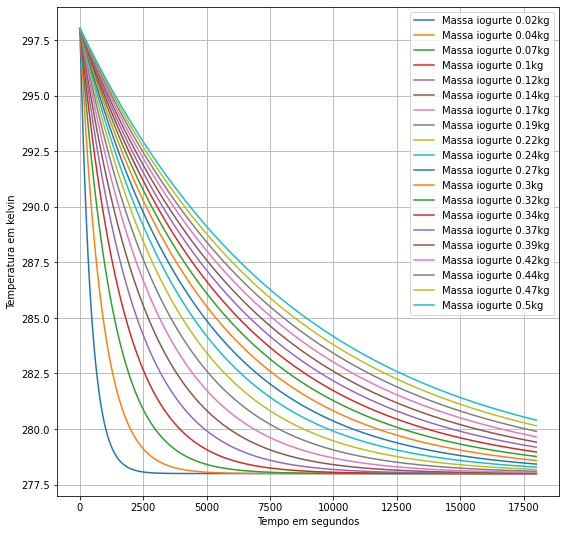

In [6]:
#OBTENÇÃO GRÁFICO TEMPERATURA DE IOGURTE POR TEMPO, PARA CADA MASSA DE IOGURTE
serie_resultado_iogurte, serie_resultado_recipiente, tempo_no_resfriamento = Grafico(False)

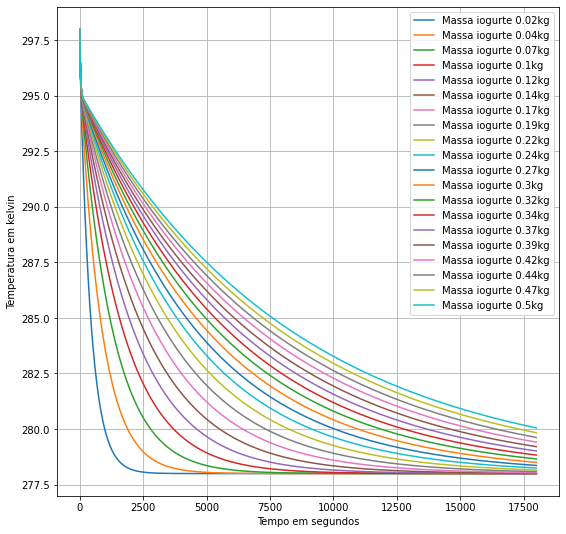

In [7]:
#OBTENÇÃO GRÁFICO TEMPERATURA DO RECIPIENTE POR TEMPO, PARA CADA MASSA DE IOGURTE
serie_resultado_iogurte, serie_resultado_recipiente, tempo_de_resfriamento = Grafico(True)

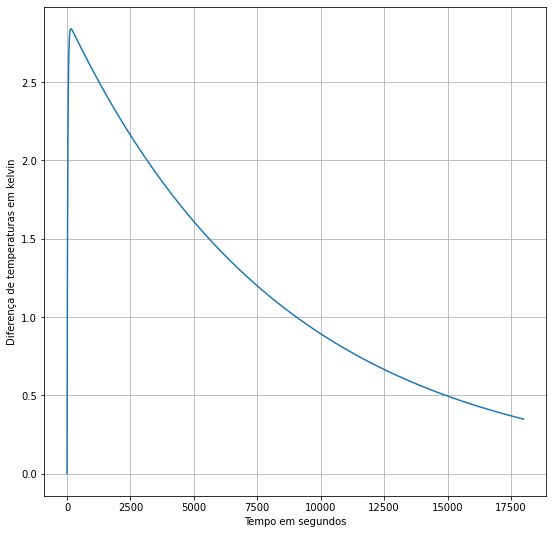

In [8]:
#PLOT DO GRÁFICO DE DIFERENÇAS DE TEMPERATURA POR TEMPO - CASO MASSA DE IOGURTE = 0.5kg
#USADO NA EXPLICAÇÃO DE FENOMENO TERMODINAMICO
dt = 1
serie_temporal = numpy.arange(0, 18000, dt)
serie_diferenças = []
for item in range(0, len(serie_temporal)):
    serie_diferenças.append(serie_resultado_iogurte[item] - serie_resultado_recipiente[item])
plt.plot(serie_temporal, serie_diferenças)
plt.xlabel("Tempo em segundos")
plt.ylabel("Diferença de temperaturas em kelvin")
plt.grid(True)
plt.show()

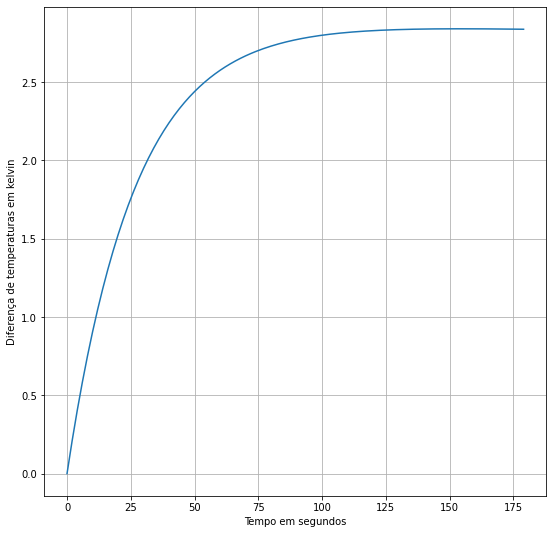

In [9]:
#MESMO GRÁFICO ACIMA, PORÉM APENAS OS 180 PRIMEIROS VALORES, PARA ESTUDAR A QUEDA INICIAL DA TEMPERATURA DO RECIPIENTE
dt = 1
serie_temporal = numpy.arange(0, 180, dt)
serie_diferenças = []
for item in range(0, len(serie_temporal)):
    serie_diferenças.append(serie_resultado_iogurte[item] - serie_resultado_recipiente[item])
plt.plot(serie_temporal, serie_diferenças)
plt.xlabel("Tempo em segundos")
plt.ylabel("Diferença de temperaturas em kelvin")
plt.grid(True)
plt.show()

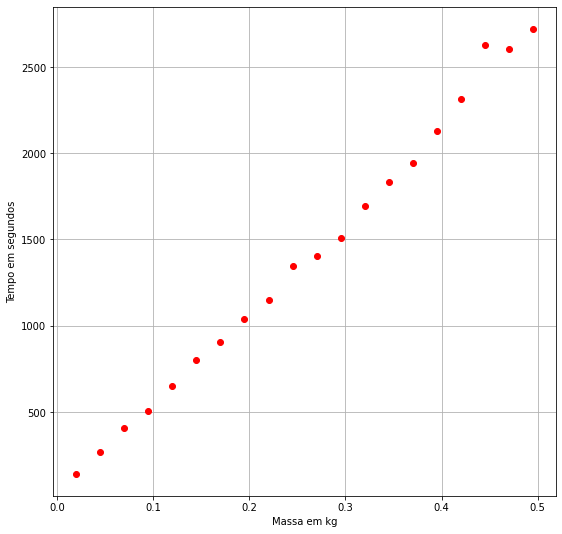

In [15]:
#TRATAMENTO DE DADOS - Queremos apenas o primeiro valor de tempo dentro da faixa de resfriamento para cada valor de massa de iogurte
tempo_chegar_no_resfriamento = []
massa_atual = 0
for i in range(1, len(tempo_no_resfriamento)):
    if tempo_no_resfriamento[i][0] != massa_atual:
        massa_atual = tempo_no_resfriamento[i][0]
        tempo_chegar_no_resfriamento.append(tempo_no_resfriamento[i][1])

#PLOT DO GRÁFICO CONCLUSIVO DISCRETO
plt.plot(Massa_de_iogurte, tempo_chegar_no_resfriamento, 'ro')
plt.xlabel("Massa em kg")
plt.ylabel("Tempo em segundos")
plt.grid(True)
plt.show()

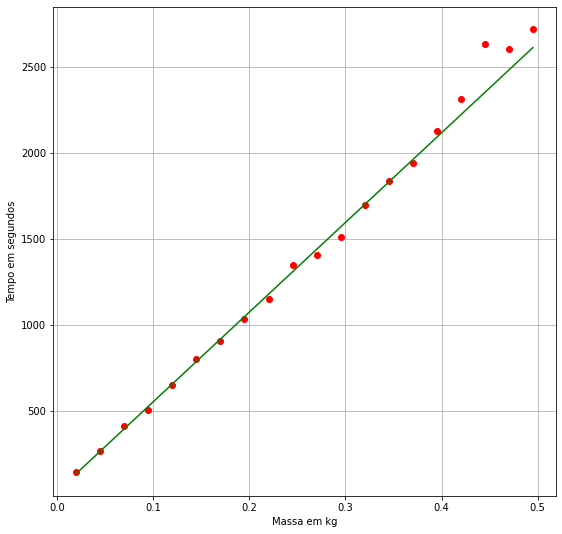

In [16]:
#OBTENÇÃO E PLOT DO GRÁFICO CONCLUSIVO COM RETA APROXIMADA PELA REGRESSÃO DOS MÍNIMOS QUADRADOS

coeficiente_a = 5212.08
coeficiente_b = 31.155
mmq = []
for massa in Massa_de_iogurte:
    mmq.append(coeficiente_a*massa + coeficiente_b)

plt.plot(Massa_de_iogurte, tempo_chegar_no_resfriamento, 'ro')
plt.plot(Massa_de_iogurte, mmq, 'g')
plt.xlabel("Massa em kg")
plt.ylabel("Tempo em segundos")
plt.grid(True)
plt.show()